# Initial data exploration

Imports and constants.

In [37]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io

Since pahtlib has some problems when working with jupyter notebooks, we'll use os package.

In [2]:
# data_images_path = pathlib.Path(__file__).parent.parent.parent / 'data' / 'raw' 
# data_csv_path = data_images_path / 'train_info.csv'
data_images_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw')
data_csv_path = os.path.join(data_images_path, 'train_info.csv')

In [3]:
painting_data = pd.read_csv(data_csv_path)

Let's explore our data a little bit.

In [4]:
painting_data

,filename,artist,title,style,genre,date
0,102257.jpg,5b39c876740bfc1cfaf544721c43cac3,Uriel,Color Field Painting,abstract,1955.0
1,75232.jpg,5b39c876740bfc1cfaf544721c43cac3,Vir Heroicus Sublimis,Color Field Painting,abstract,1950.0
2,29855.jpg,96e5bc98488ed589b9bf17ad9fd09371,Night March of a Hundred Demons (left half),Yamato-e,mythological painting,NaN
3,62252.jpg,5b39c876740bfc1cfaf544721c43cac3,"Who’s Afraid of Red, Yellow and Blue II",Color Field Painting,abstract,NaN
4,63861.jpg,5b39c876740bfc1cfaf544721c43cac3,Black Fire I,Color Field Painting,abstract,1963.0
...,...,...,...,...,...,...
79428,23862.jpg,67959e4e5df05b3d9db7c97fd9a0b0f6,Number 547,Abstract Expressionism,NaN,1954.0
79429,25525.jpg,2d72f2000c42051e7c350a39bdce9bc1,Number 13A (Arabesque),Action painting,abstract,1948.0
79430,47038.jpg,f920b951670e3d8dc3c759f12ced7a3e,St. Francis of Assisi,Baroque,religious painting,NaN
79431,9021.jpg,e4183fd3d19c2bca8b7c56d19af92252,Thebe's Revenge,NaN,marina,1982.0


In [5]:
painting_data['style'].value_counts(normalize=True, dropna=False).head(15)

Impressionism              0.103483
Realism                    0.102124
Romanticism                0.088641
Expressionism              0.067038
Post-Impressionism         0.056991
Art Nouveau (Modern)       0.047575
Baroque                    0.040965
Surrealism                 0.039442
Symbolism                  0.033059
Rococo                     0.026450
Northern Renaissance       0.022963
Naïve Art (Primitivism)    0.022358
Neoclassicism              0.020420
Abstract Expressionism     0.019463
Cubism                     0.016567
Name: style, dtype: float64

As a reminder, our goal is to classify paintings by their style, so that's the only thing that will be useful to us, as at a later stage while using the app, we won't have the rest of the information available (only pictures taken by phone camera). With just a quick glance, we can already identify a few problems:
- Really big discrepancies between classes; we'll have to either limit the number of instances per class or decide on some arbitrary number of classes to classify from.
- Big granularity between classes; to someone who's not an art expert, some of these classes can be easily classifiable as a single class, for example Baroqe and Rococo (which is an extension of Baroque), Neoclassicism and Academicism (which is a combination of the former with Romanticism) and possibly, many more.

Since the amount of data is really large and we'll be expanding the scope of the project as we go, we should start with a piece of data, and add more as we migrate to AWS S3.

For now, let's see whether points made above still stand with approximately 1/4th of data. 

In [7]:
painting_data_reduced = painting_data[painting_data['filename'].str.startswith('1') 
                                      | painting_data['filename'].str.startswith('2')]

In [8]:
painting_data_reduced

,filename,artist,title,style,genre,date
0,102257.jpg,5b39c876740bfc1cfaf544721c43cac3,Uriel,Color Field Painting,abstract,1955.0
2,29855.jpg,96e5bc98488ed589b9bf17ad9fd09371,Night March of a Hundred Demons (left half),Yamato-e,mythological painting,NaN
10,23508.jpg,782192dc825c7c1149825adcb7caacbc,Hydrangea and Kingfisher,Ukiyo-e,bird-and-flower painting,NaN
12,27254.jpg,782192dc825c7c1149825adcb7caacbc,"Moon, Swallows and Peach Blossoms",Ukiyo-e,bird-and-flower painting,1850
15,16876.jpg,44eee069716bb323fdde08eecdcd9c74,The Madonna in the Church,Northern Renaissance,religious painting,1439
...,...,...,...,...,...,...
79419,17181.jpg,881b2bce83c5e3fa4667c15654e9fb82,Wall Drawing #260,Minimalism,abstract,1975.0
79425,21240.jpg,63b769fe292fcd09463dcebb2c2fc6e6,Composition,Concretism,abstract,NaN
79426,17971.jpg,e4f90e4cae5e75ee90d8852c013c0ff2,Study of Horse Heads,Early Renaissance,sketch and study,1433
79428,23862.jpg,67959e4e5df05b3d9db7c97fd9a0b0f6,Number 547,Abstract Expressionism,NaN,1954.0


In [9]:
painting_data_reduced['style'].value_counts(normalize=True, dropna=False).head(20)

Impressionism                   0.105482
Realism                         0.099738
Romanticism                     0.084098
Expressionism                   0.069894
Post-Impressionism              0.058151
Art Nouveau (Modern)            0.046767
Surrealism                      0.041331
Baroque                         0.040459
Symbolism                       0.033127
Rococo                          0.027127
Northern Renaissance            0.023537
Naïve Art (Primitivism)         0.020768
Neoclassicism                   0.019845
Abstract Expressionism          0.018922
Cubism                          0.016102
High Renaissance                0.014256
Ukiyo-e                         0.013897
Mannerism (Late Renaissance)    0.013281
Art Informel                    0.012512
Early Renaissance               0.011640
Name: style, dtype: float64

When compared with the whole dataset, we can see the proportions are about the same, and some of the classes don't even appear in this piece of data.

One conclusion could potentially be drawn here: since they are the most widely represented in our data, they could be the most popular, and these art styles are most likely to be encountered by app's users. Furthermore, at this stage of the project, it doesn't make sense to try and solve classification problem for every single style and picking a couple (say 20 most popular styles) and focusing on these should be good enough. We can always improve later on, when more resources are available and the pipelines are built. 

For now, we'll only classify styles that are represented by at least 250 images and we'll limit the occurence of every class to this number aswell. Like mentioned above, we can always scale it up or down, depending on the model's performance, which we'll see shortly. 

In [10]:
styles_to_classify = painting_data_reduced['style'].value_counts().reset_index(name="count").query("count > 250")["index"]

styles_bool_mask = painting_data_reduced['style'].isin(styles_to_classify)

In [25]:
images_array = []
labels_array = []

for style in styles_to_classify:
    concatenate_images = painting_data_reduced[painting_data_reduced['style'] == style].head(5)['filename'].values
    concatenate_labels = painting_data_reduced[painting_data_reduced['style'] == style].head(5)['style'].values
    images_array = np.append(images_array, concatenate_images)
    labels_array = np.append(labels_array, concatenate_labels)    

In [30]:
images_array[:5], labels_array[:5]

(array(['17146.jpg', '19464.jpg', '21276.jpg', '28824.jpg', '26042.jpg'],
       dtype=object),
 array(['Impressionism', 'Impressionism', 'Impressionism', 'Impressionism',
        'Impressionism'], dtype=object))

Let's see one of the images and its label; we'll see Ukiyo-e since it's easily distinguisable from the others:

Ukiyo-e


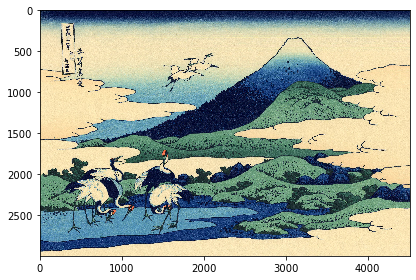

In [29]:
sample_image_path = os.path.join(data_images_path, images_array[-6])
io.imshow(image)

print(labels_array[-6])

As you can see, the image has high pixel count and we won't need it in this form; all of the images will have to be the same size, so we need to come up with appropriate preprocessing strategy.

Last but not least, let's copy over all the images we need to a different directory  where they'll be preprocessed; we'll rename them with their labels and consecutive image number.

In [40]:
for index, (image, label) in enumerate(zip(images_array, labels_array)):
    current_file = os.path.join(data_images_path, image)
    new_file_path = os.path.join(os.path.dirname(data_images_path), 'interim', f'{index}_{label}.jpg')
    print(current_file, new_file_path)
#     shutil.copy(current_file, new_file_path)
    

ValueError: not enough values to unpack (expected 3, got 2)

We have succesfully chosen the files for our analysis, renamed them and copied over to the appropriate directory; let's take advantage of last assigned variable inside the loop being available outside of it, and check the last saved file:

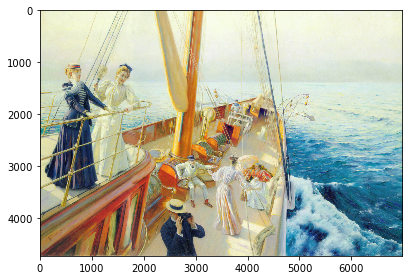

In [39]:
io.imshow(new_file_path)

We could actually preprocess all the files here, but it's best if the whole process is incorporated either in our neural network or even better, in a custom pipeline, which we'll do sometime soon. 